Forecasting Time-Series data with Prophet

http://pythondata.com/forecasting-time-series-data-with-prophet-part-1/

In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd

In [2]:
sales_df = pd.read_csv('https://raw.githubusercontent.com/facebookincubator/prophet/master/examples/example_retail_sales.csv')

This is the format that Prophet expects to see. There needs to be a ‘ds’ column  that contains the datetime field and and a ‘y’ column that contains the value we are wanting to model/forecast.

In [3]:
sales_df[:2]

,ds,y
0,1992-01-01,146376
1,1992-02-01,147079


In [4]:
sales_df['y_orig']=sales_df['y']
sales_df['y']=np.log(sales_df['y'])
sales_df[:2]

,ds,y,y_orig
0,1992-01-01,11.893934,146376
1,1992-02-01,11.898725,147079


In [5]:
model=Prophet()
model.fit(sales_df)

Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [6]:
future_data = model.make_future_dataframe(periods=6, freq = 'm')

In this line of code, we are creating a pandas dataframe with 6 (periods = 6) future data points with a monthly frequency (freq = ‘m’).  If you’re working with daily data, you wouldn’t want include freq=’m’.

In [7]:
forecast_data = model.predict(future_data)

In [8]:
forecast_data[:2]

,ds,t,trend,seasonal_lower,seasonal_upper,trend_lower,trend_upper,yhat_lower,yhat_upper,yearly,yearly_lower,yearly_upper,seasonal,yhat
0,1992-01-01,0.000000,11.989446,-0.114830,-0.114830,11.989446,11.989446,11.854679,11.894741,-0.114830,-0.114830,-0.114830,-0.114830,11.874616
1,1992-02-01,0.003488,11.995861,-0.104684,-0.104684,11.995861,11.995861,11.871316,11.911499,-0.104684,-0.104684,-0.104684,-0.104684,11.891177


In [9]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
294,2016-06-30,13.057142,13.036677,13.077132
295,2016-07-31,13.081225,13.061486,13.100489
296,2016-08-31,13.014295,12.994154,13.036143
297,2016-09-30,13.036715,13.015639,13.057210
298,2016-10-31,13.054164,13.032931,13.075868


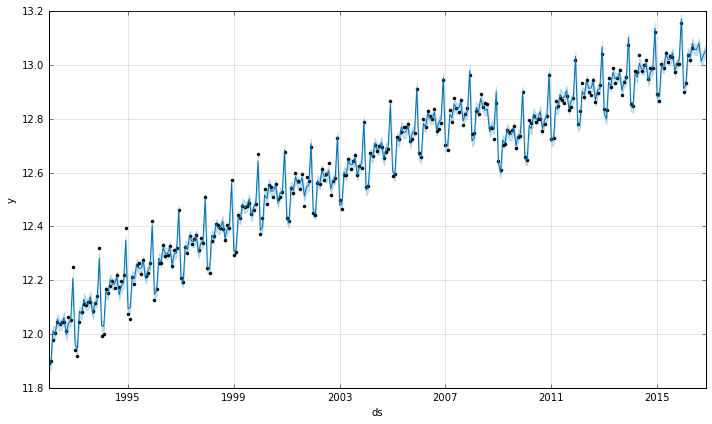

In [10]:
model.plot(forecast_data)

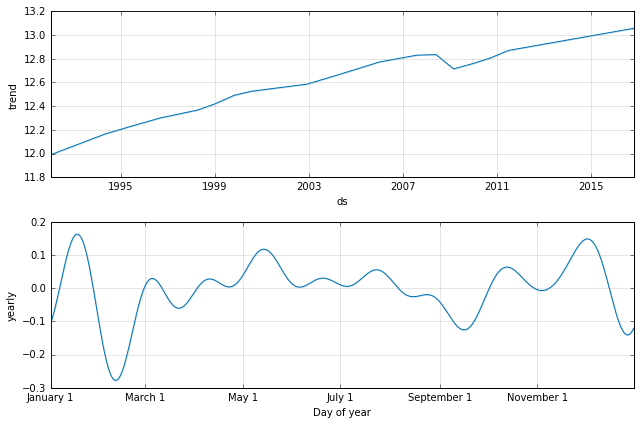

In [11]:
model.plot_components(forecast_data)

In [12]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

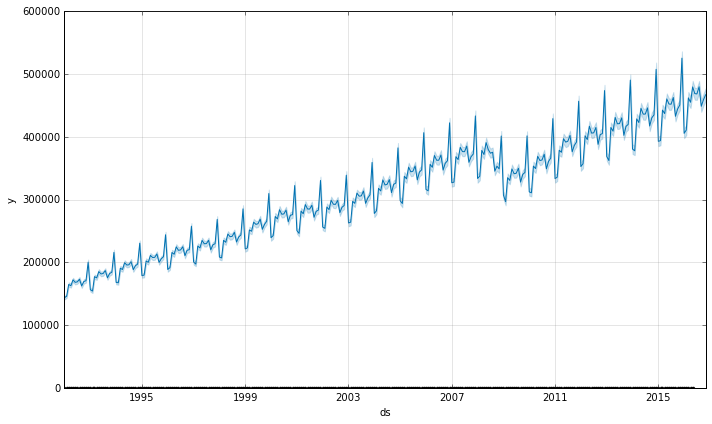

In [13]:
model.plot(forecast_data_orig)

In [14]:
sales_df['y_log']=sales_df['y'] #copy the log-transformed data to another column
sales_df['y']=sales_df['y_orig'] #copy the original data to 'y'

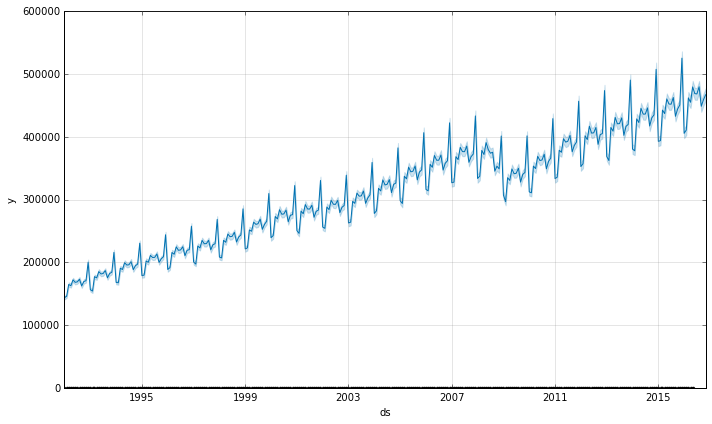

In [15]:
model.plot(forecast_data_orig)